<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Supervised Learning - Foundations</center></font></h1>
<h1><center>Linear Regression - Week 1</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2017/04/25/05/14/samurai-2258604_960_720.jpg" width="1080" height="500"></center>

<b><h2><center>Anime Ratings Case Study</center></h2></b>

## Problem Statement

### Business Context

Streaming media services facilitate on-demand or real-time presentation and distribution of audio, video, and multimedia content across a communications route without downloading the files to their systems. This saves users time and storage, and at the same time provides the media owners with built-in copy protection. In today's digital space, streaming has become an influential medium for accessing information. Improved connectivity and advancement in technology have made streaming services accessible to almost everyone having an internet connection, and the surging demand for on-demand entertainment services such as entertainment programs and live matches is boosting the adoption of streaming media services globally.

Streamist is a streaming company that streams web series and movies to a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.


### Objective

Streamist is currently focusing on the anime available in their portal and wants to identify the most important factors involved in rating an anime.  As a data scientist at Streamist, you are tasked with analyzing the  portal's anime data and identifying the important factors by building a predictive model to predict the rating of an anime.



### Data Dictionary

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

1. title: title of the anime
2. mediaType: format of publication
3. eps: number of episodes (movies are considered 1 episode)
4. duration: duration of an episode in minutes
5. startYr: the year that airing started
6. finishYr: the year that airing finished
7. description: the synopsis of the plot
8. contentWarn: content warning
9. watched: number of users that completed it
10. watching: number of users that are watching it
11. rating: average user rating
12. votes: number of votes that contribute to the rating
13. studio_primary: studios responsible for creation
14. studios_colab: whether there was a collaboration between studios for anime production
15. genre: genre to which the anime belongs

## Importing necessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [ ]:
# for mounting Google Drive to the notebook (to be used only if executing in Google Colab)
from google.colab import drive
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

## Loading the dataset

In [ ]:
data = pd.read_csv("anime_ratings_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


<IPython.core.display.Javascript object>

* The dataset contains information about different anime
* Many anime seem to have a single episode only, which are movies
* Description seems to be missing for some anime

### Checking the shape of the dataset

In [ ]:
data.shape

(6523, 15)

<IPython.core.display.Javascript object>

* The dataset contains information (15 attributes) about 6523 anime

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


<IPython.core.display.Javascript object>

* There are 8 numeric (*float* and *int* type) and 7 string (*object* type) columns in the data
* The target variable is the rating of an anime, which is of *float* type

### Statistical summary of the dataset

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


<IPython.core.display.Javascript object>

* We can see that the anime ratings vary between 1.1 and 4.7, which suggests that the anime were rated on a scale of 0-5
* The general rating of anime is 2.96
* *TV* is the most occurring type of media.
* The number of views for the anime in the data varies from 5 to ~5000
* The number of votes received by an anime in the data varies from 10 to 3100

### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
data.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in many columns.

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

* The anime ratings are close to normally distributed with fatter tails
* Anime are rated approximately 3 by viewers on average

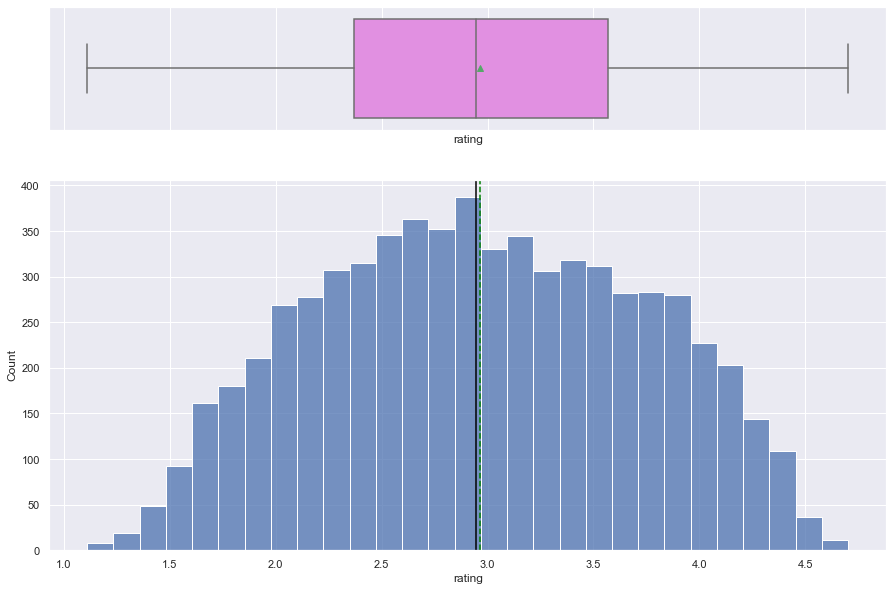

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "rating")

* The distribution for duration column is right-skewed with a median runtime of less than 10 minutes
* There are a few anime with episodes having 1 hour or more runtime, and are likely to be movies




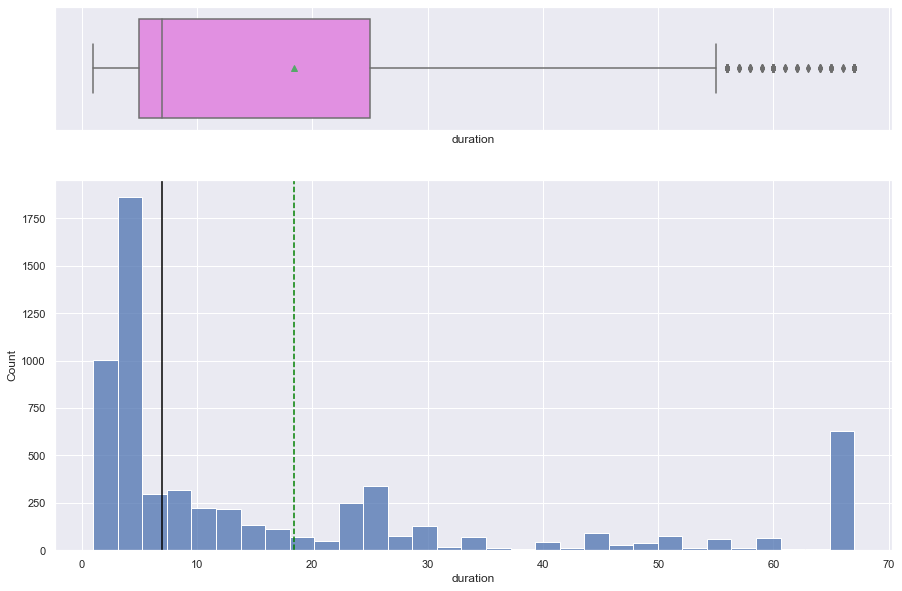

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "duration")

* The distribution for watched is heavily right-skewed, and most of the anime having less than 500 viewers
* There is a spike at ~4500 in the histogram, indicating that there are anime which have been viewed by a lot of users

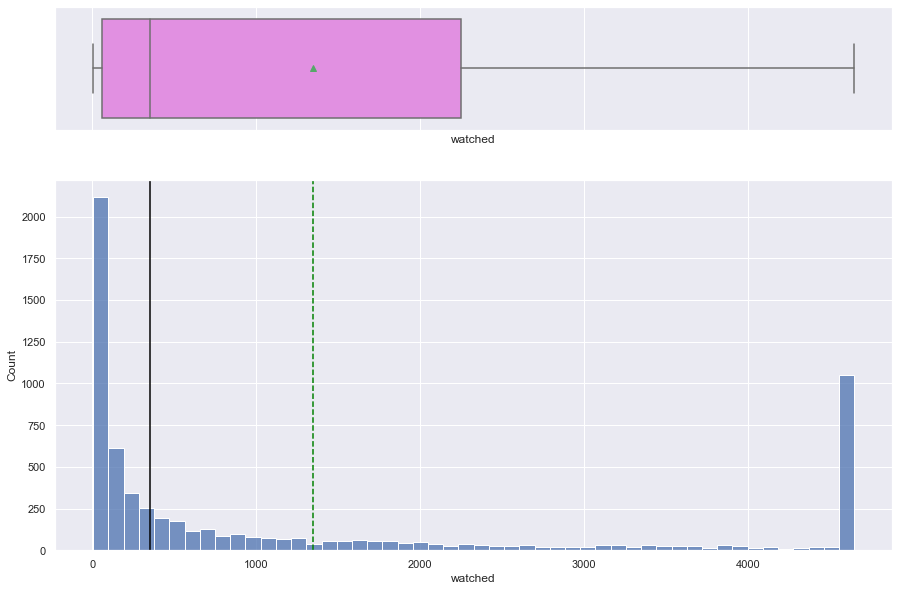

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "watched", bins=50)

* The distribution for `watching` is heavily right-skewed, and most of the anime have less than 50 current viewers
* There is a spike at ~200 in the histogram, indicating that there are anime which are being viewed by a lot of users

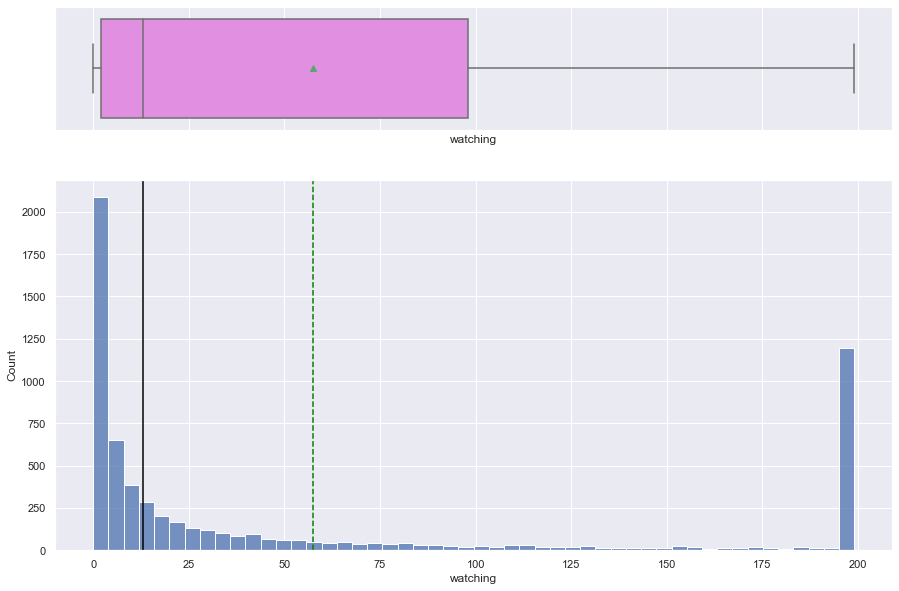

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "watching", bins=50)

* Approximately one-third of the anime have been released for TV
* 9% of the anime have been released as web series, which is a little surprising 

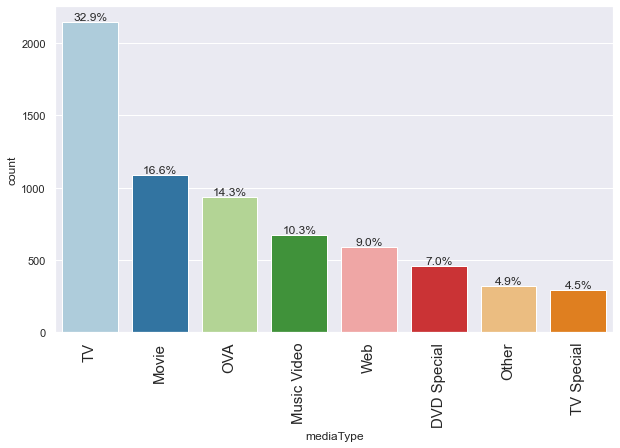

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "mediaType", perc=True)

* The rating of an anime is highly correlated with the number of people who have watched the anime and voted for it on the portal
* The number of people who have watched the anime is highly correlated with the number of people who are watching the anime
* The number of people who have watched the anime is very highly correlated with the number of people who have voted for the anime on the portal

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("startYr")
num_cols.remove("finishYr")

<IPython.core.display.Javascript object>

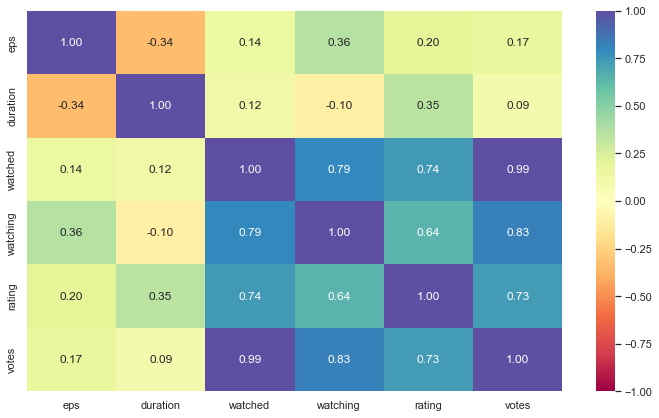

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Anime available as web series or music videos have a lower rating in general

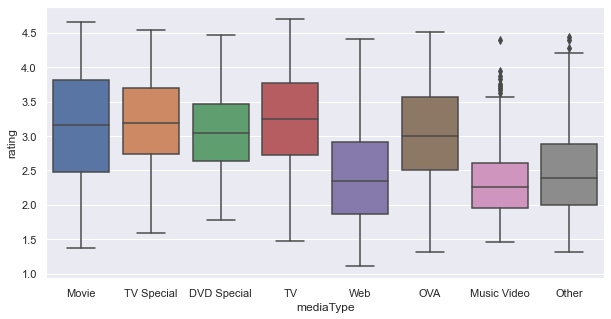

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="rating")
plt.show()

* Anime under the genre of Drama are rated the highest in general, while those under the genre of Comedy and rated the least

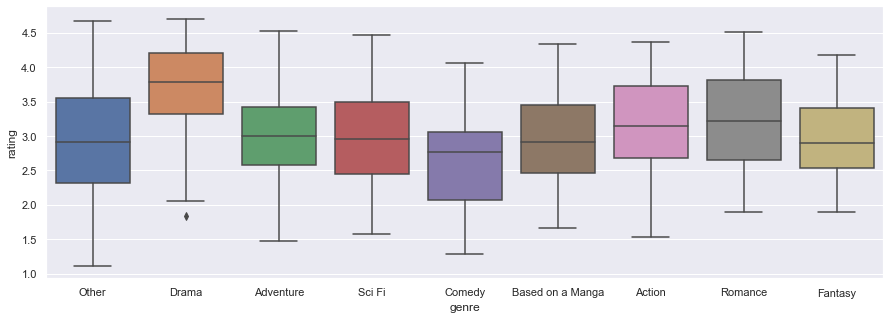

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="rating")
plt.show()

* Anime under the genres of Drama and Romance have higher viewership in general

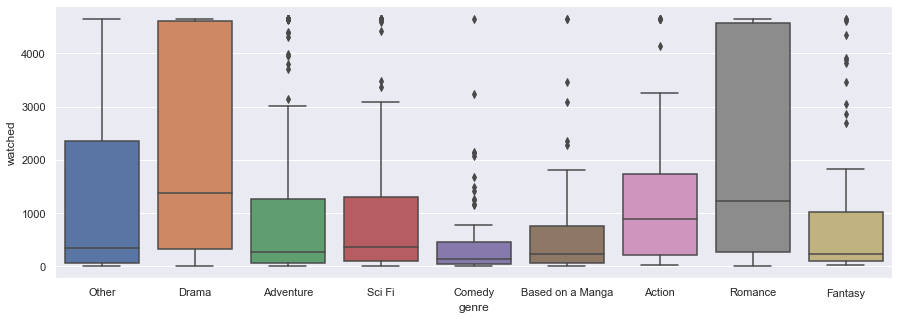

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="watched")
plt.show()

* Anime from the Drama and Romance genres are being watched more in general

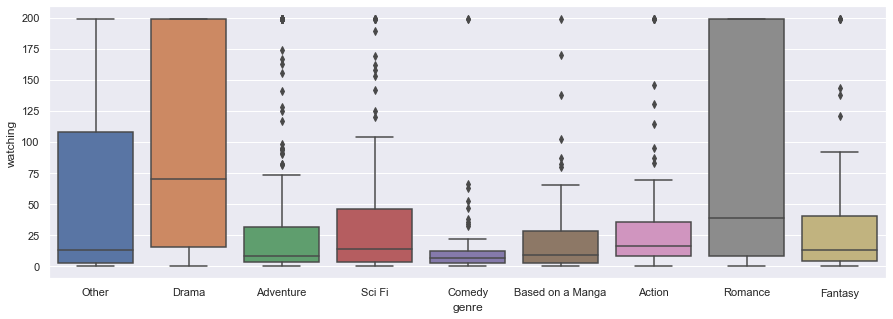

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="watching")
plt.show()

* Anime released as movies or TV speicals have the highest duration while music videos have the lowest, which is expected

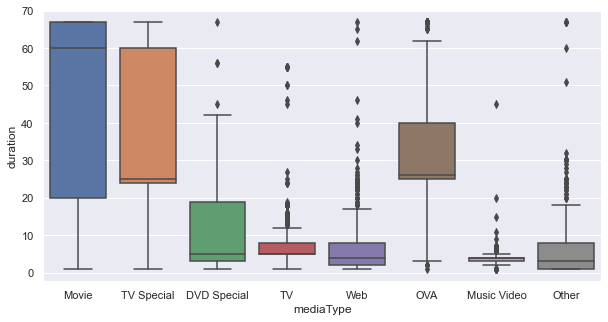

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="duration")
plt.show()

## Data Preprocessing

### Missing Value Treatment

In [ ]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

<IPython.core.display.Javascript object>

Let's fix the missing values in the data.

- For the variable `mediaType`, we will impute the missing values with '*Other*' as the exact values for that category are not known
- For the variables `duration` and `votes`, we will impute the missing values in each column with the median grouped by `genre` and `mediaType` as both the columns have skewed distributions

In [ ]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy()

<IPython.core.display.Javascript object>

In [ ]:
df1.mediaType.fillna("Other", inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
df1["duration"] = df1["duration"].fillna(
    value=df1.groupby(["genre", "mediaType"])["duration"].transform("median")
)
df1["votes"] = df1["votes"].fillna(
    value=df1.groupby(["genre", "mediaType"])["votes"].transform("median")
)

df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

<IPython.core.display.Javascript object>

* We will impute the remaining missing values in the `duration` column with the median grouped by `genre`

In [ ]:
df1["duration"] = df1["duration"].fillna(
    value=df1.groupby(["genre"])["duration"].transform("median")
)

df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values have been treated.

### Feature Engineering

* Let's create a new feature `years_running` by taking the difference between `finishYr` and `startYr` columns
* We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature

In [ ]:
df1["years_running"] = df1["finishYr"] - df1["startYr"]
df1.drop(["startYr", "finishYr"], axis=1, inplace=True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


<IPython.core.display.Javascript object>

### Outlier Detection

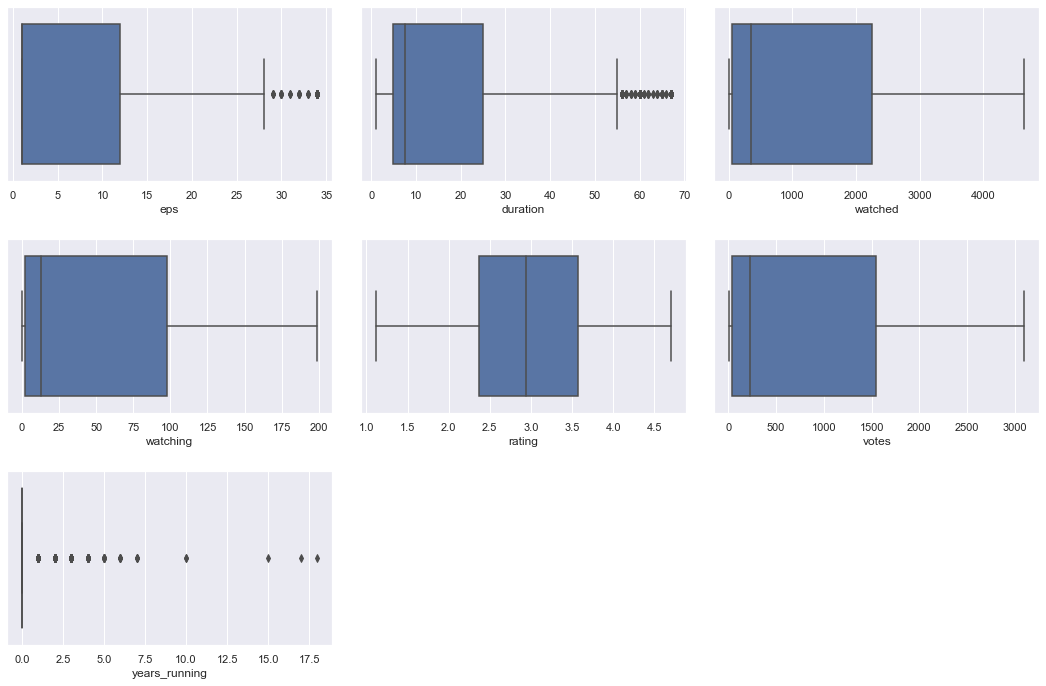

<IPython.core.display.Javascript object>

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are a few outliers in the data
- However, we will not treat them as they are proper values
- We will drop the columns `title` and `description` as they contain a lot of text and too many unique values, and can be excluded from modeling

In [ ]:
df1.drop(["title", "description"], axis=1, inplace=True)
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


<IPython.core.display.Javascript object>

### Data Preparation for Modeling

- We want to predict the rating of an anime
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# defining X and y variables
X = df1.drop(["rating"], axis=1)
y = df1["rating"]

print(X.head())
print(y.head())

     mediaType  eps  duration contentWarn  watched  watching   votes  \
0        Movie    1      67.0          No     4649        86  3100.0   
1        Movie    1       5.0          No       10         0    10.0   
2   TV Special    1      46.0          No     1630        16  1103.0   
3        Movie    1      67.0          No     4649       184  3100.0   
4  DVD Special    1       4.0          No      346         8   234.0   

   studio_primary studios_colab  genre  years_running  
0  Toei Animation            No  Other              0  
1          Others            No  Other              0  
2          Others            No  Other              0  
3          Others            No  Drama              0  
4          Others            No  Other              0  
0    3.979
1    2.120
2    3.758
3    4.444
4    2.494
Name: rating, dtype: float64


<IPython.core.display.Javascript object>

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1.0,1,5.0,10,0,10.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,46.0,1630,16,1103.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,1,67.0,4649,184,3100.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,1,4.0,346,8,234.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4566
Number of rows in test data = 1957


<IPython.core.display.Javascript object>

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:13:32   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

<IPython.core.display.Javascript object>

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.722**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **2.7707**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `duration` is **0.0123**.

### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40112,0.330417,0.722387,0.720304,12.444742


<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.413096,0.340426,0.703053,0.6978,12.56679


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 0.72, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.34 on the test data

- MAPE of 12.6 on the test data means that we are able to predict within 12.6% of the anime ratings

## Conclusion

- We have seen how to build a linear regression model, how to predict the rating of an anime using various factors, and how to check the model's performance.

- Next, we have to check the statistical validity of our model. For this, we will check if the model satisfies the assumptions of linear regression. Only then we will be able to make inferences from it.

### We will be discussing the assumptions of linear regression and statistical inference in the next session.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### `rating`

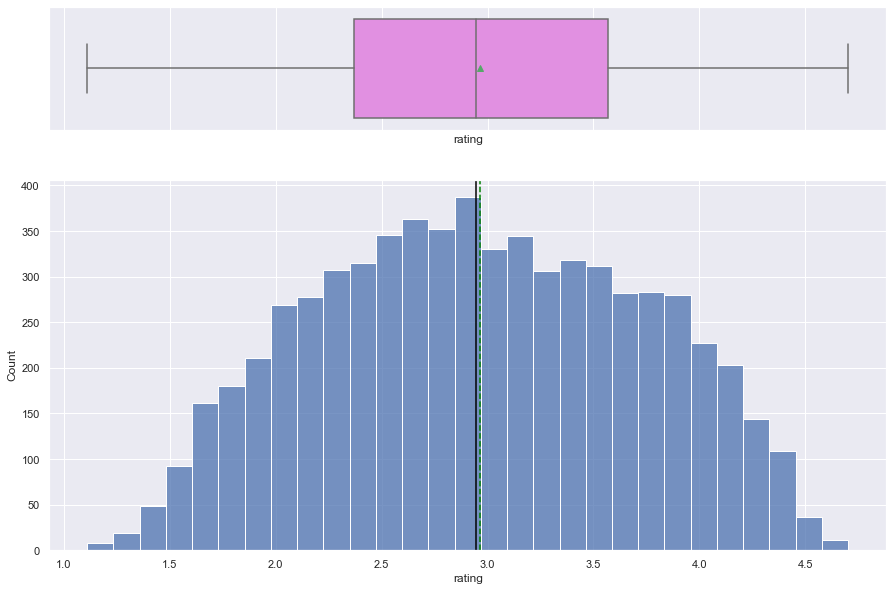

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "rating")

* The anime ratings are kind of normally distributed with much fatter tails.

#### `eps`

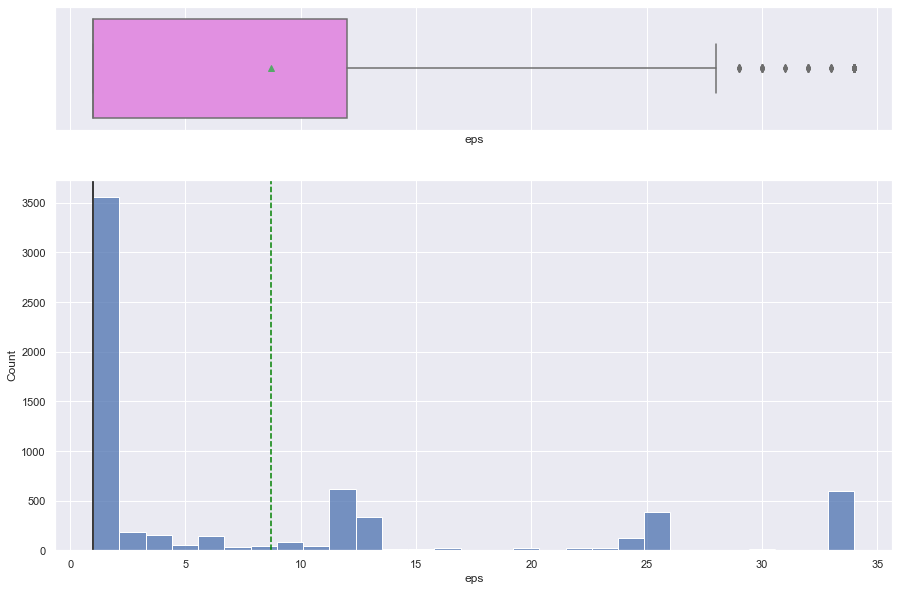

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "eps")

* The distribution is right-skewed, as there are many anime movies in the data and they are considered to be of only one episode (as per data description)

#### `duration`

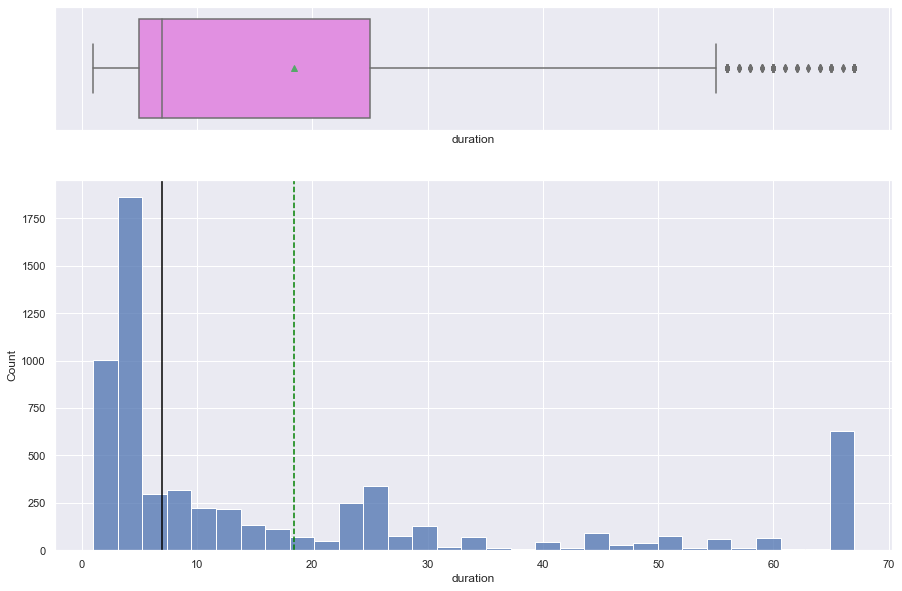

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

#### `watched`

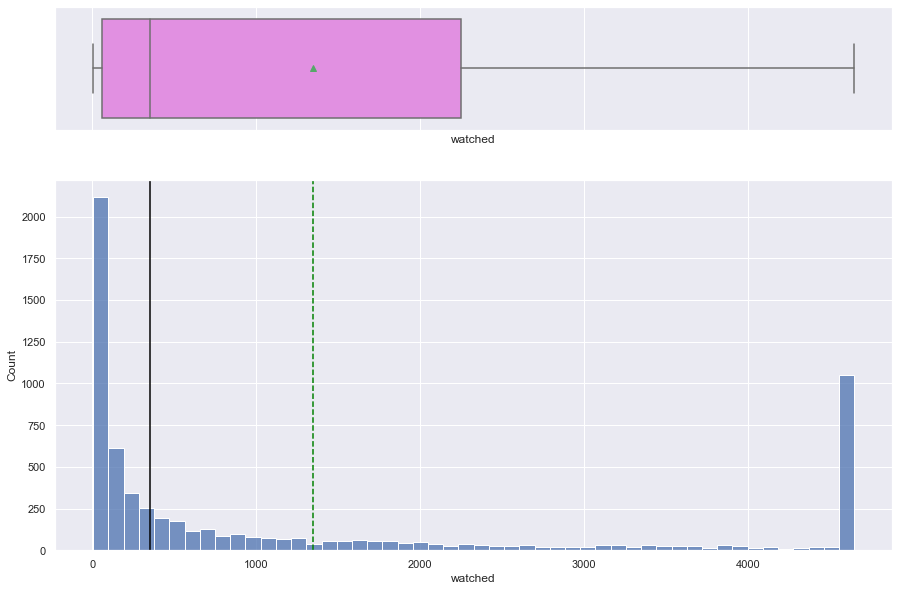

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "watched", bins=50)

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

#### `watching`

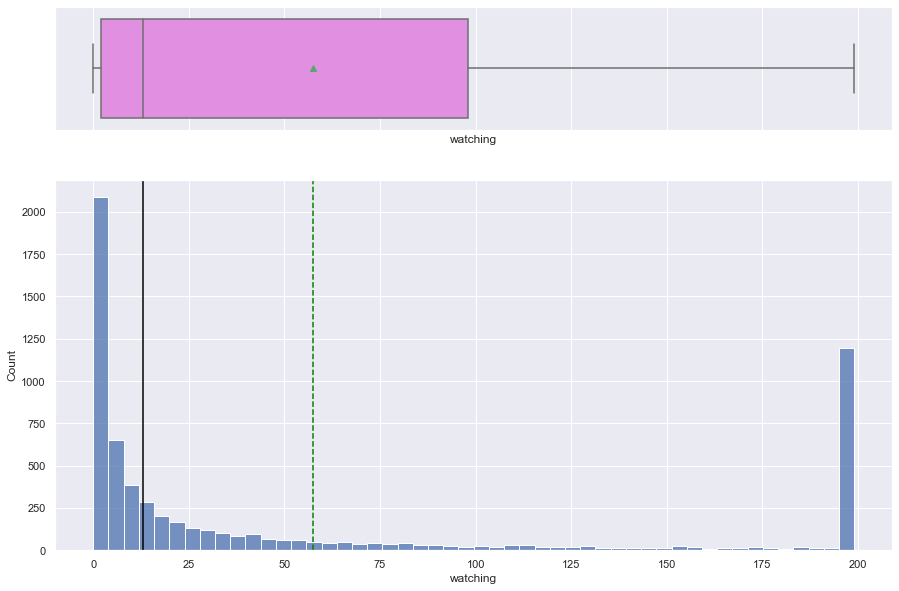

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "watching", bins=50)

* The distribution is heavily right-skewed.

#### `votes`

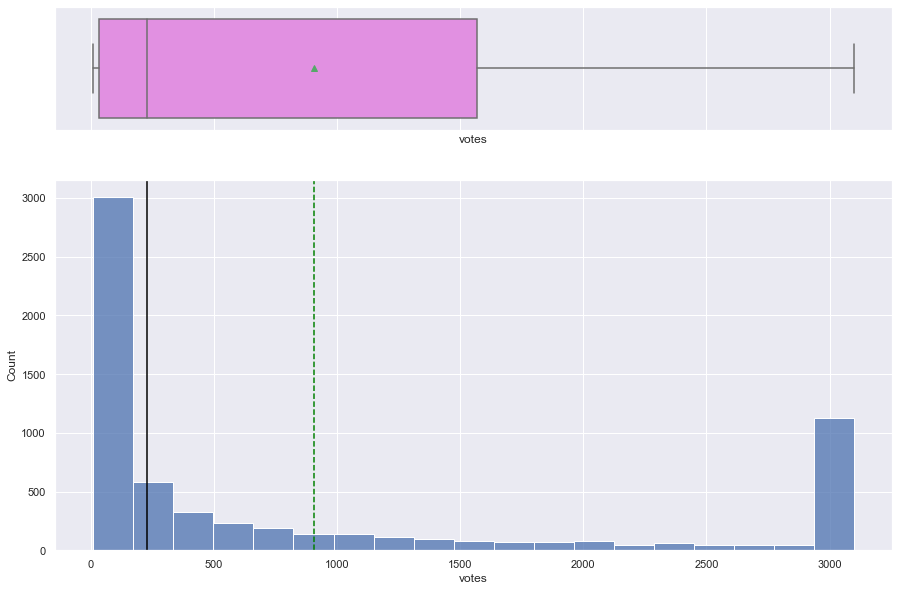

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "votes")

* The distribution is heavily right-skewed and seems to be bimodal, with most anime having less than 250 or more 2500 votes

#### `startYr`

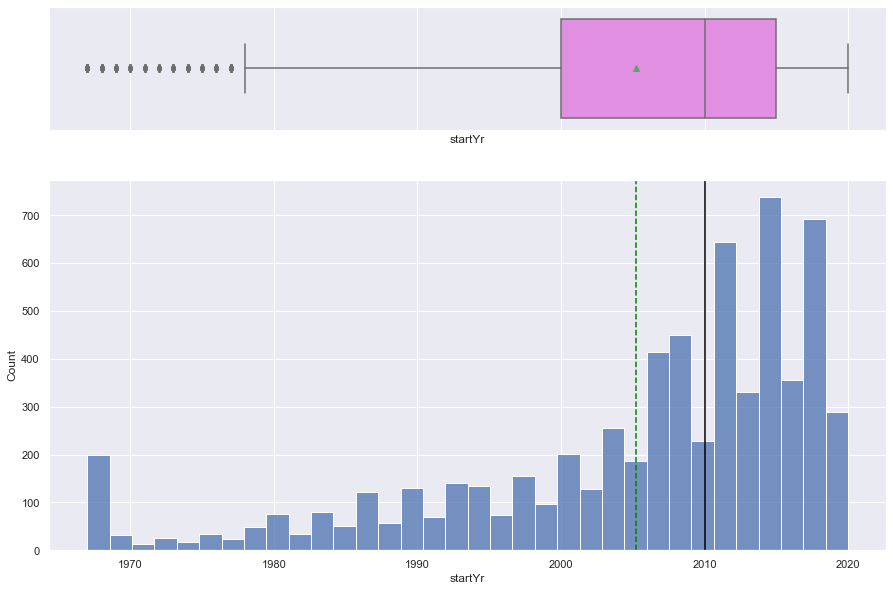

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "startYr")

* The distribution is left-skewed and most of the anime have started after 2005

#### `finishYr`

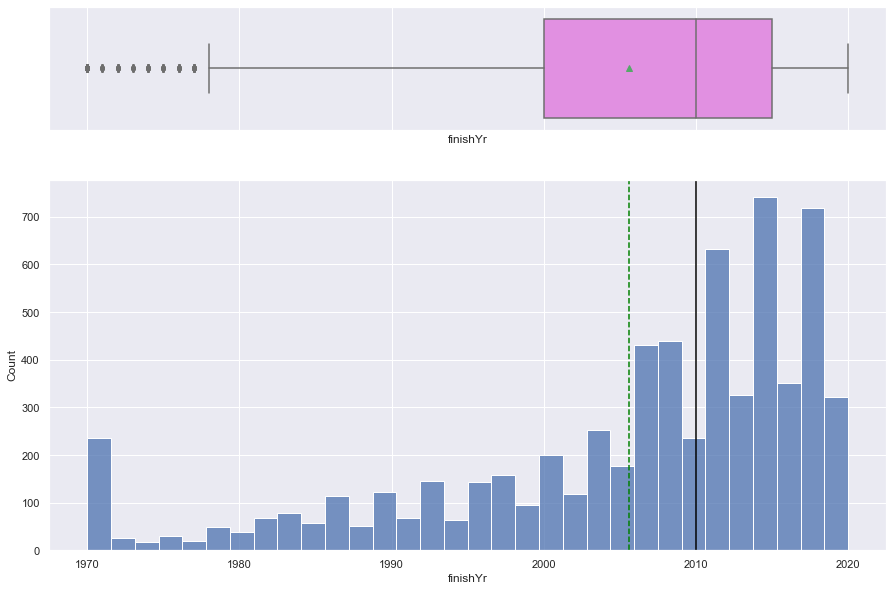

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "finishYr")

* The distribution is left-skewed and most of the anime have finished after 2005

#### `mediaType`

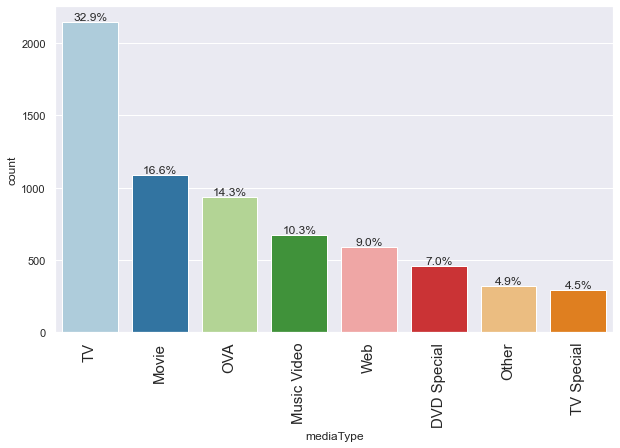

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "mediaType", perc=True)

* Most of the anime are released for TV

#### `studio_primary`

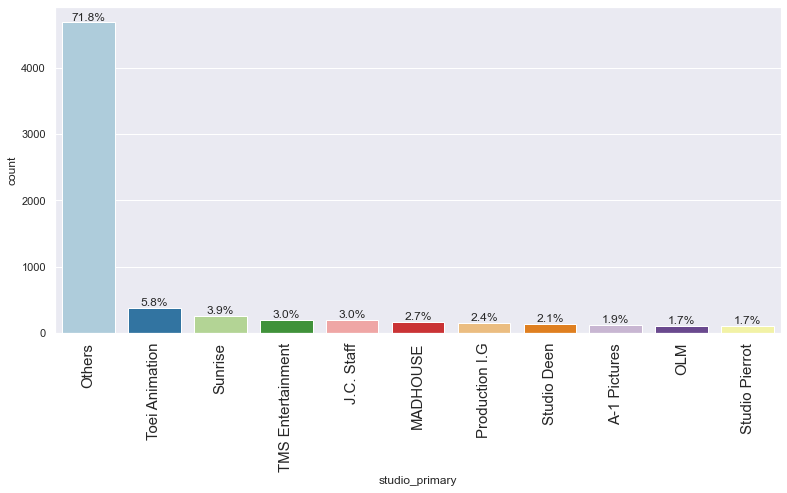

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "studio_primary", perc=True)

* *Toei Animation* is the most common studio among the available studio names

#### `studios_colab`

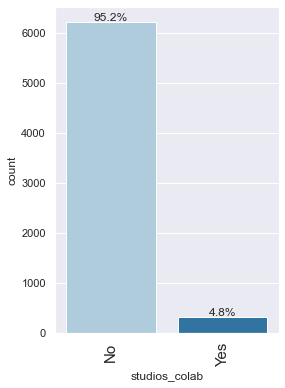

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "studios_colab", perc=True)

- More than 95% of the anime in the data do not involve a collaboration between studios

#### `contentWarn`

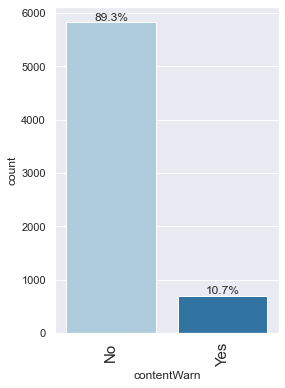

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "contentWarn", perc=True)

- Nearly 90% of the anime in the data do not have an associated content warning.

### Bivariate analysis

#### Correlation Check

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("startYr")
num_cols.remove("finishYr")

<IPython.core.display.Javascript object>

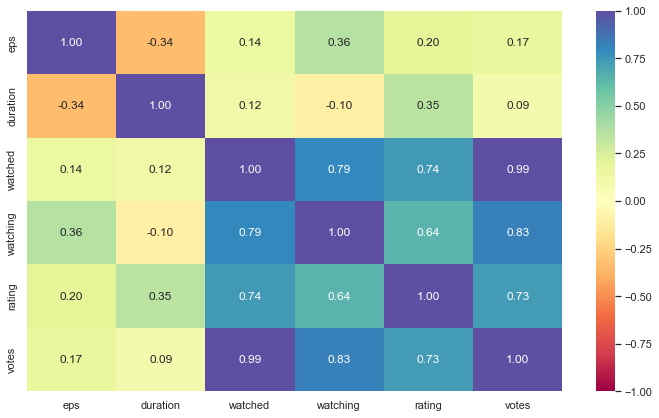

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The rating of an anime is highly correlated with the number of people who have watched the anime and voted for it on the portal
* The number of people who have watched the anime is highly correlated with the number of people who are watching the anime
* The number of people who have watched the anime is very highly correlated with the number of people who have voted for the anime on the portal

#### Let's check the variation in the anime ratings with some of the categorical columns in the data.

#### `genre` vs `rating`

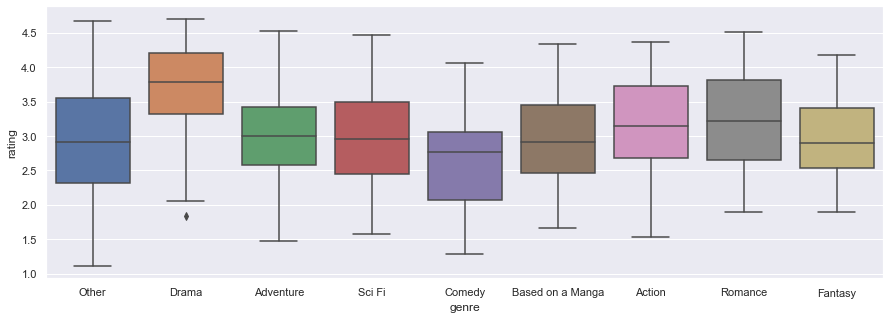

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="rating")
plt.show()

* Anime under the genre of Drama are rated the highest in general, while those under the genre of Comedy and rated the least

#### `genre` vs `watched`

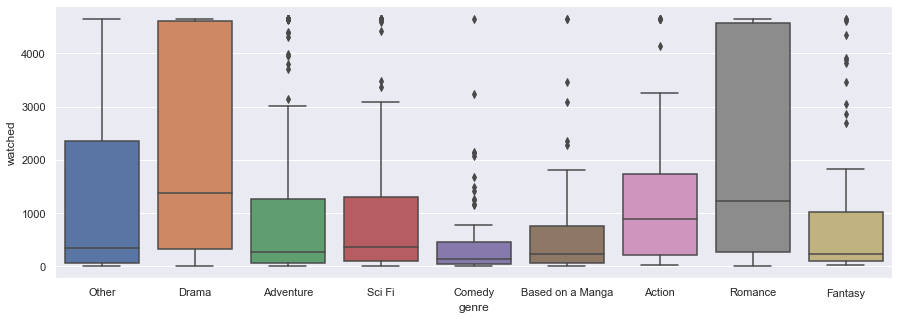

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="watched")
plt.show()

* Anime under the genres of Drama and Romance have higher viewership in general

#### `mediaType` vs `rating`

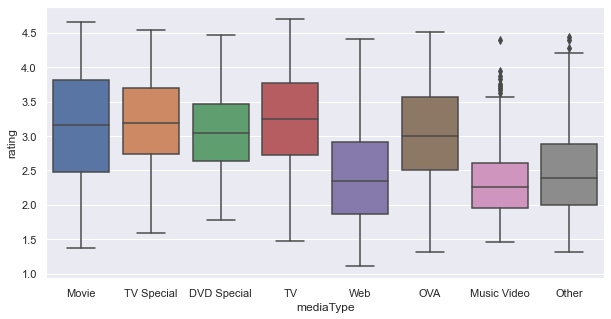

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="rating")
plt.show()

* Anime available as web series or music videos have a lower rating in general

#### `mediaType` vs `watched`

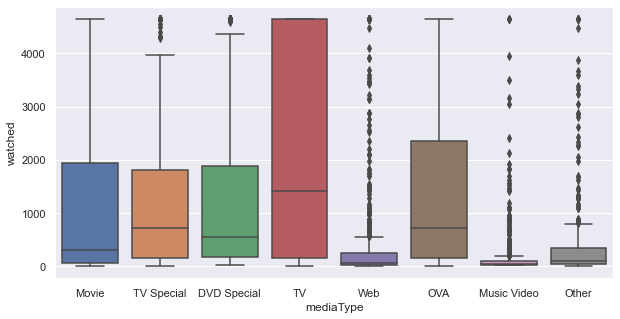

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="watched")
plt.show()

* Anime released as web series and music videos have lower viewership in general

#### `studio_primary` vs `rating`

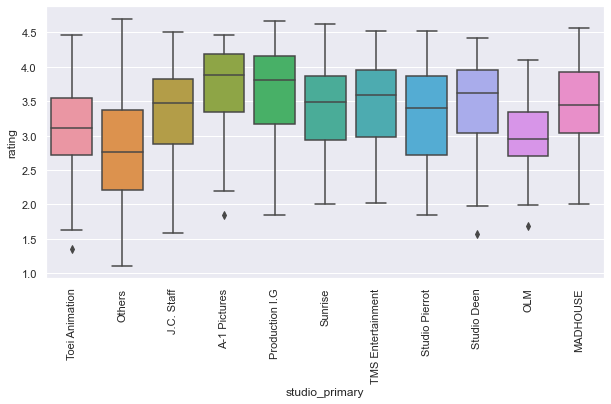

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="studio_primary", y="rating")
plt.xticks(rotation=90)
plt.show()

* The ratings are low for anime created by *OLM* studios in general
* Ratings are also low, in general, for anime created by studios other than the ones in the data

#### `mediaType` vs `duration`

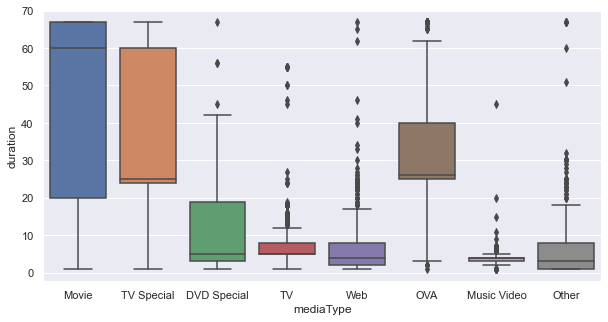

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="duration")
plt.show()

* Anime movies have the highest duration while music videos have the lowest, which is expected

#### `mediaType` vs `eps`

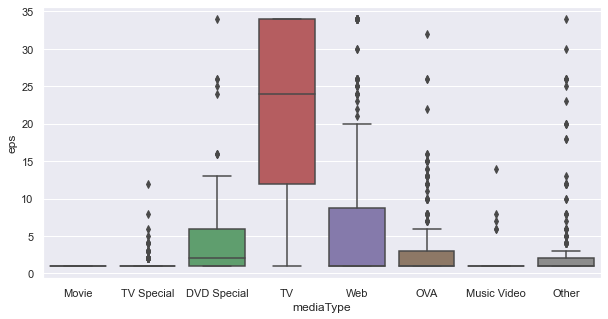

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="eps")
plt.show()

* Anime movies have seem to have exactly one episode, which is in line with the data description
* Anime released for TV have the highest number of episodes (more than 20) in general

In [ ]:
df[df.mediaType == "Movie"]["eps"].describe()

count    1085.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: eps, dtype: float64

<IPython.core.display.Javascript object>

* This confirms that anime movies have exactly one episode

#### `genre` vs `watched`

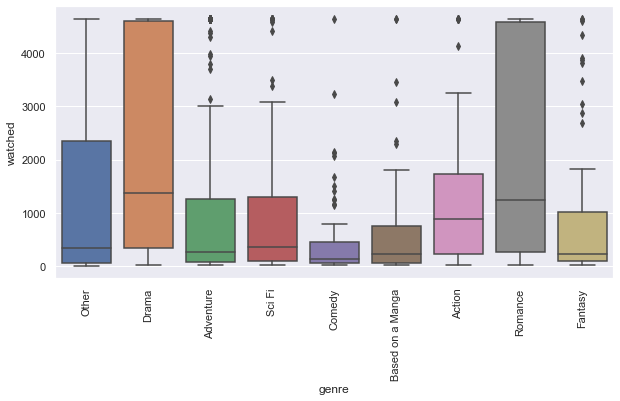

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="watched")
plt.xticks(rotation=90)
plt.show()

* Anime from the Drama and Comedy genres have been watched more in general

#### `genre` vs `watching`

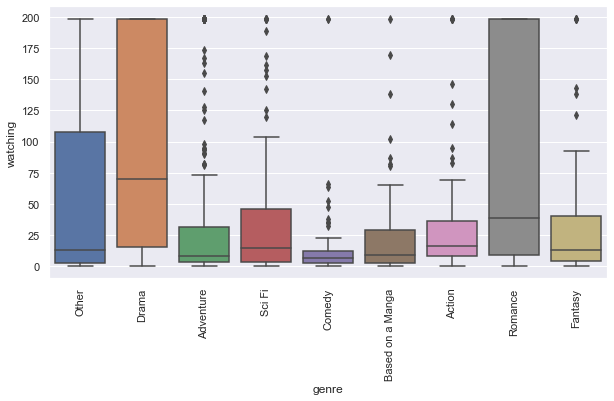

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="watching")
plt.xticks(rotation=90)
plt.show()

* Anime from the Drama and Comedy genres are being watched more in general

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

___